#### About this file
Single .csv with over 740k rows. Data includes country, locality, market, goods purchased, price & currency used, quantity exchanged, and month, year of purchase.

* adm0_id: country id
* adm0_name: country name
* adm1_id: locality id
* adm1_name: locality name
* mkt_id: market id
* mkt_name: market name
* cm_id: commodity purchase id
* cm_name: commodity purchased
* cur_id: currency id
* cur_name: name of currency
* pt_id: market type id
* pt_name: market type (Retail/Wholesale/Producer/Farm Gate)
* um_id: measurement id
* um_name: unit of goods measurement
* mp_month: month recorded
* mp_year: year recorded
* mp_price: price paid
* mp_commoditysource: Source supplying price information

In [1]:
import os
import pandas as pd
import numpy as np

from pylab import rcParams
import statsmodels.api as sm

# Important imports for preprocessing, modeling, and evaluation
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

# Visualization package imports
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv("food_prices_larges.csv")

In [3]:
df.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,1,2014,50.0,WFP
1,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,2,2014,50.0,WFP
2,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,3,2014,50.0,WFP
3,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,4,2014,50.0,WFP
4,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,5,2014,50.0,WFP


### Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers) 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743914 entries, 0 to 743913
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   adm0_id             743914 non-null  int64  
 1   adm0_name           743914 non-null  object 
 2   adm1_id             743914 non-null  int64  
 3   adm1_name           729965 non-null  object 
 4   mkt_id              743914 non-null  int64  
 5   mkt_name            743914 non-null  object 
 6   cm_id               743914 non-null  int64  
 7   cm_name             743914 non-null  object 
 8   cur_id              743914 non-null  int64  
 9   cur_name            743914 non-null  object 
 10  pt_id               743914 non-null  int64  
 11  pt_name             743914 non-null  object 
 12  um_id               743914 non-null  int64  
 13  um_name             743914 non-null  object 
 14  mp_month            743914 non-null  int64  
 15  mp_year             743914 non-nul

In [5]:
df.shape

(743914, 18)

In [6]:
df.isnull().sum()

adm0_id                   0
adm0_name                 0
adm1_id                   0
adm1_name             13949
mkt_id                    0
mkt_name                  0
cm_id                     0
cm_name                   0
cur_id                    0
cur_name                  0
pt_id                     0
pt_name                   0
um_id                     0
um_name                   0
mp_month                  0
mp_year                   0
mp_price                  0
mp_commoditysource        0
dtype: int64

In [7]:
df['mp_price'].value_counts()

200.0000    10487
300.0000     8233
500.0000     7980
400.0000     7609
250.0000     6761
            ...  
15.8508         1
15.8123         1
15.7883         1
15.7050         1
183.7000        1
Name: mp_price, Length: 113564, dtype: int64

#### Gather descriptive statistics about the data

In [8]:
df.describe()

,adm0_id,adm1_id,mkt_id,cm_id,cur_id,pt_id,um_id,mp_month,mp_year,mp_price
count,743914.000000,743914.000000,743914.000000,743914.000000,743914.000000,743914.000000,743914.000000,743914.000000,743914.000000,7.439140e+05
mean,929.754832,17779.426232,885.962341,161.130914,57.325319,14.930508,10.562171,6.379772,2012.516549,4.196333e+03
std,6595.353806,81345.242217,540.492854,117.826297,23.140366,0.277872,13.160485,3.434972,3.669519,5.549296e+04
min,1.000000,0.000000,80.000000,50.000000,22.000000,14.000000,5.000000,1.000000,1992.000000,0.000000e+00
25%,115.000000,1510.000000,377.000000,67.000000,30.000000,15.000000,5.000000,3.000000,2011.000000,3.000000e+01
50%,170.000000,2207.000000,912.000000,110.000000,63.000000,15.000000,5.000000,6.000000,2013.000000,1.750000e+02
75%,205.000000,21969.000000,1134.000000,233.000000,77.000000,15.000000,5.000000,9.000000,2015.000000,5.000000e+02
max,70001.000000,900022.000000,2094.000000,490.000000,95.000000,18.000000,100.000000,12.000000,2017.000000,5.833333e+06


### Rename columns

In [9]:
# create a copy of the dataset
df_cpy = df.copy()


In [10]:
# Display all column names

df_cpy.columns

Index(['adm0_id', 'adm0_name', 'adm1_id', 'adm1_name', 'mkt_id', 'mkt_name',
       'cm_id', 'cm_name', 'cur_id', 'cur_name', 'pt_id', 'pt_name', 'um_id',
       'um_name', 'mp_month', 'mp_year', 'mp_price', 'mp_commoditysource'],
      dtype='object')

In [11]:
df_cpy = df_cpy.rename(columns={"adm0_id": "country_id","adm0_name":"country_name","adm1_id": "locality_id",
                                    "adm1_name": "locality_name","mkt_id":"market_id","mkt_name":"market_name",
                                    "cm_id":"commodityID","cm_name":"commodity","cur_id":"currency_id",
                                    "cur_name":"currency_name","pt_id":"market_typeID","pt_name":"market_type", 
                                    "um_id":"measurement_id","um_name":"unit_goods_measurement","mp_month":"month",
                                    "mp_year":"year","mp_price":"price","mp_commoditysource":"Source"})

##### Check duplicates and replace Nan Values

In [12]:
df_cpy.duplicated().sum()

0

In [13]:
df_cpy["locality_name"].fillna("Not Available", inplace = True)
df_cpy.head()

,country_id,country_name,locality_id,locality_name,market_id,market_name,commodityID,commodity,currency_id,currency_name,market_typeID,market_type,measurement_id,unit_goods_measurement,month,year,price,Source
0,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,1,2014,50.0,WFP
1,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,2,2014,50.0,WFP
2,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,3,2014,50.0,WFP
3,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,4,2014,50.0,WFP
4,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,5,2014,50.0,WFP


In [14]:
df_cpy.isnull().sum()

country_id                0
country_name              0
locality_id               0
locality_name             0
market_id                 0
market_name               0
commodityID               0
commodity                 0
currency_id               0
currency_name             0
market_typeID             0
market_type               0
measurement_id            0
unit_goods_measurement    0
month                     0
year                      0
price                     0
Source                    0
dtype: int64

## Data Exploration (Continue EDA)

#### Data visualizations
Examine the variables and create plots to visualize relationships between variables in the data.

### Data Distribution for each Country

In [15]:
 #Number of rows for each country

country_unique, country_freq = np.unique(df_cpy['country_name'], return_counts = True)
listrows = []
for i in range(country_unique.shape[0]):
    
    print(country_unique[i], ': ', country_freq[i])
    listrows.append( [country_unique[i], country_freq[i]])

Afghanistan :  4676
Algeria :  1784
Armenia :  6078
Azerbaijan :  125
Bangladesh :  3035
Benin :  3452
Bhutan :  78
Bolivia :  4447
Burkina Faso :  8783
Burundi :  3847
Cambodia :  3960
Cameroon :  4984
Cape Verde :  276
Central African Republic :  963
Chad :  3205
Colombia :  8296
Congo :  2420
Costa Rica :  297
Cote d'Ivoire :  4641
Democratic Republic of the Congo :  29997
Djibouti :  2791
Egypt :  1310
El Salvador :  6011
Ethiopia :  9604
Gambia :  21575
Georgia :  80
Ghana :  8112
Guatemala :  3001
Guinea :  2183
Guinea-Bissau :  1293
Haiti :  5141
Honduras :  523
India :  68308
Indonesia :  1343
Iran  (Islamic Republic of) :  305
Iraq :  1987
Jordan :  2281
Kenya :  3639
Kyrgyzstan :  18466
Lao People's Democratic Republic :  15436
Lebanon :  15942
Lesotho :  5175
Liberia :  5832
Madagascar :  6437
Malawi :  15104
Mali :  32702
Mauritania :  5253
Mozambique :  22652
Myanmar :  14601
Nepal :  4845
Niger :  36195
Nigeria :  10406
Pakistan :  4307
Panama :  174
Peru :  883
Philippin

In [16]:
listrows

[['Afghanistan', 4676],
 ['Algeria', 1784],
 ['Armenia', 6078],
 ['Azerbaijan', 125],
 ['Bangladesh', 3035],
 ['Benin', 3452],
 ['Bhutan', 78],
 ['Bolivia', 4447],
 ['Burkina Faso', 8783],
 ['Burundi', 3847],
 ['Cambodia', 3960],
 ['Cameroon', 4984],
 ['Cape Verde', 276],
 ['Central African Republic', 963],
 ['Chad', 3205],
 ['Colombia', 8296],
 ['Congo', 2420],
 ['Costa Rica', 297],
 ["Cote d'Ivoire", 4641],
 ['Democratic Republic of the Congo', 29997],
 ['Djibouti', 2791],
 ['Egypt', 1310],
 ['El Salvador', 6011],
 ['Ethiopia', 9604],
 ['Gambia', 21575],
 ['Georgia', 80],
 ['Ghana', 8112],
 ['Guatemala', 3001],
 ['Guinea', 2183],
 ['Guinea-Bissau', 1293],
 ['Haiti', 5141],
 ['Honduras', 523],
 ['India', 68308],
 ['Indonesia', 1343],
 ['Iran  (Islamic Republic of)', 305],
 ['Iraq', 1987],
 ['Jordan', 2281],
 ['Kenya', 3639],
 ['Kyrgyzstan', 18466],
 ["Lao People's Democratic Republic", 15436],
 ['Lebanon', 15942],
 ['Lesotho', 5175],
 ['Liberia', 5832],
 ['Madagascar', 6437],
 ['Malaw

In [17]:
df_count = df_cpy.copy()

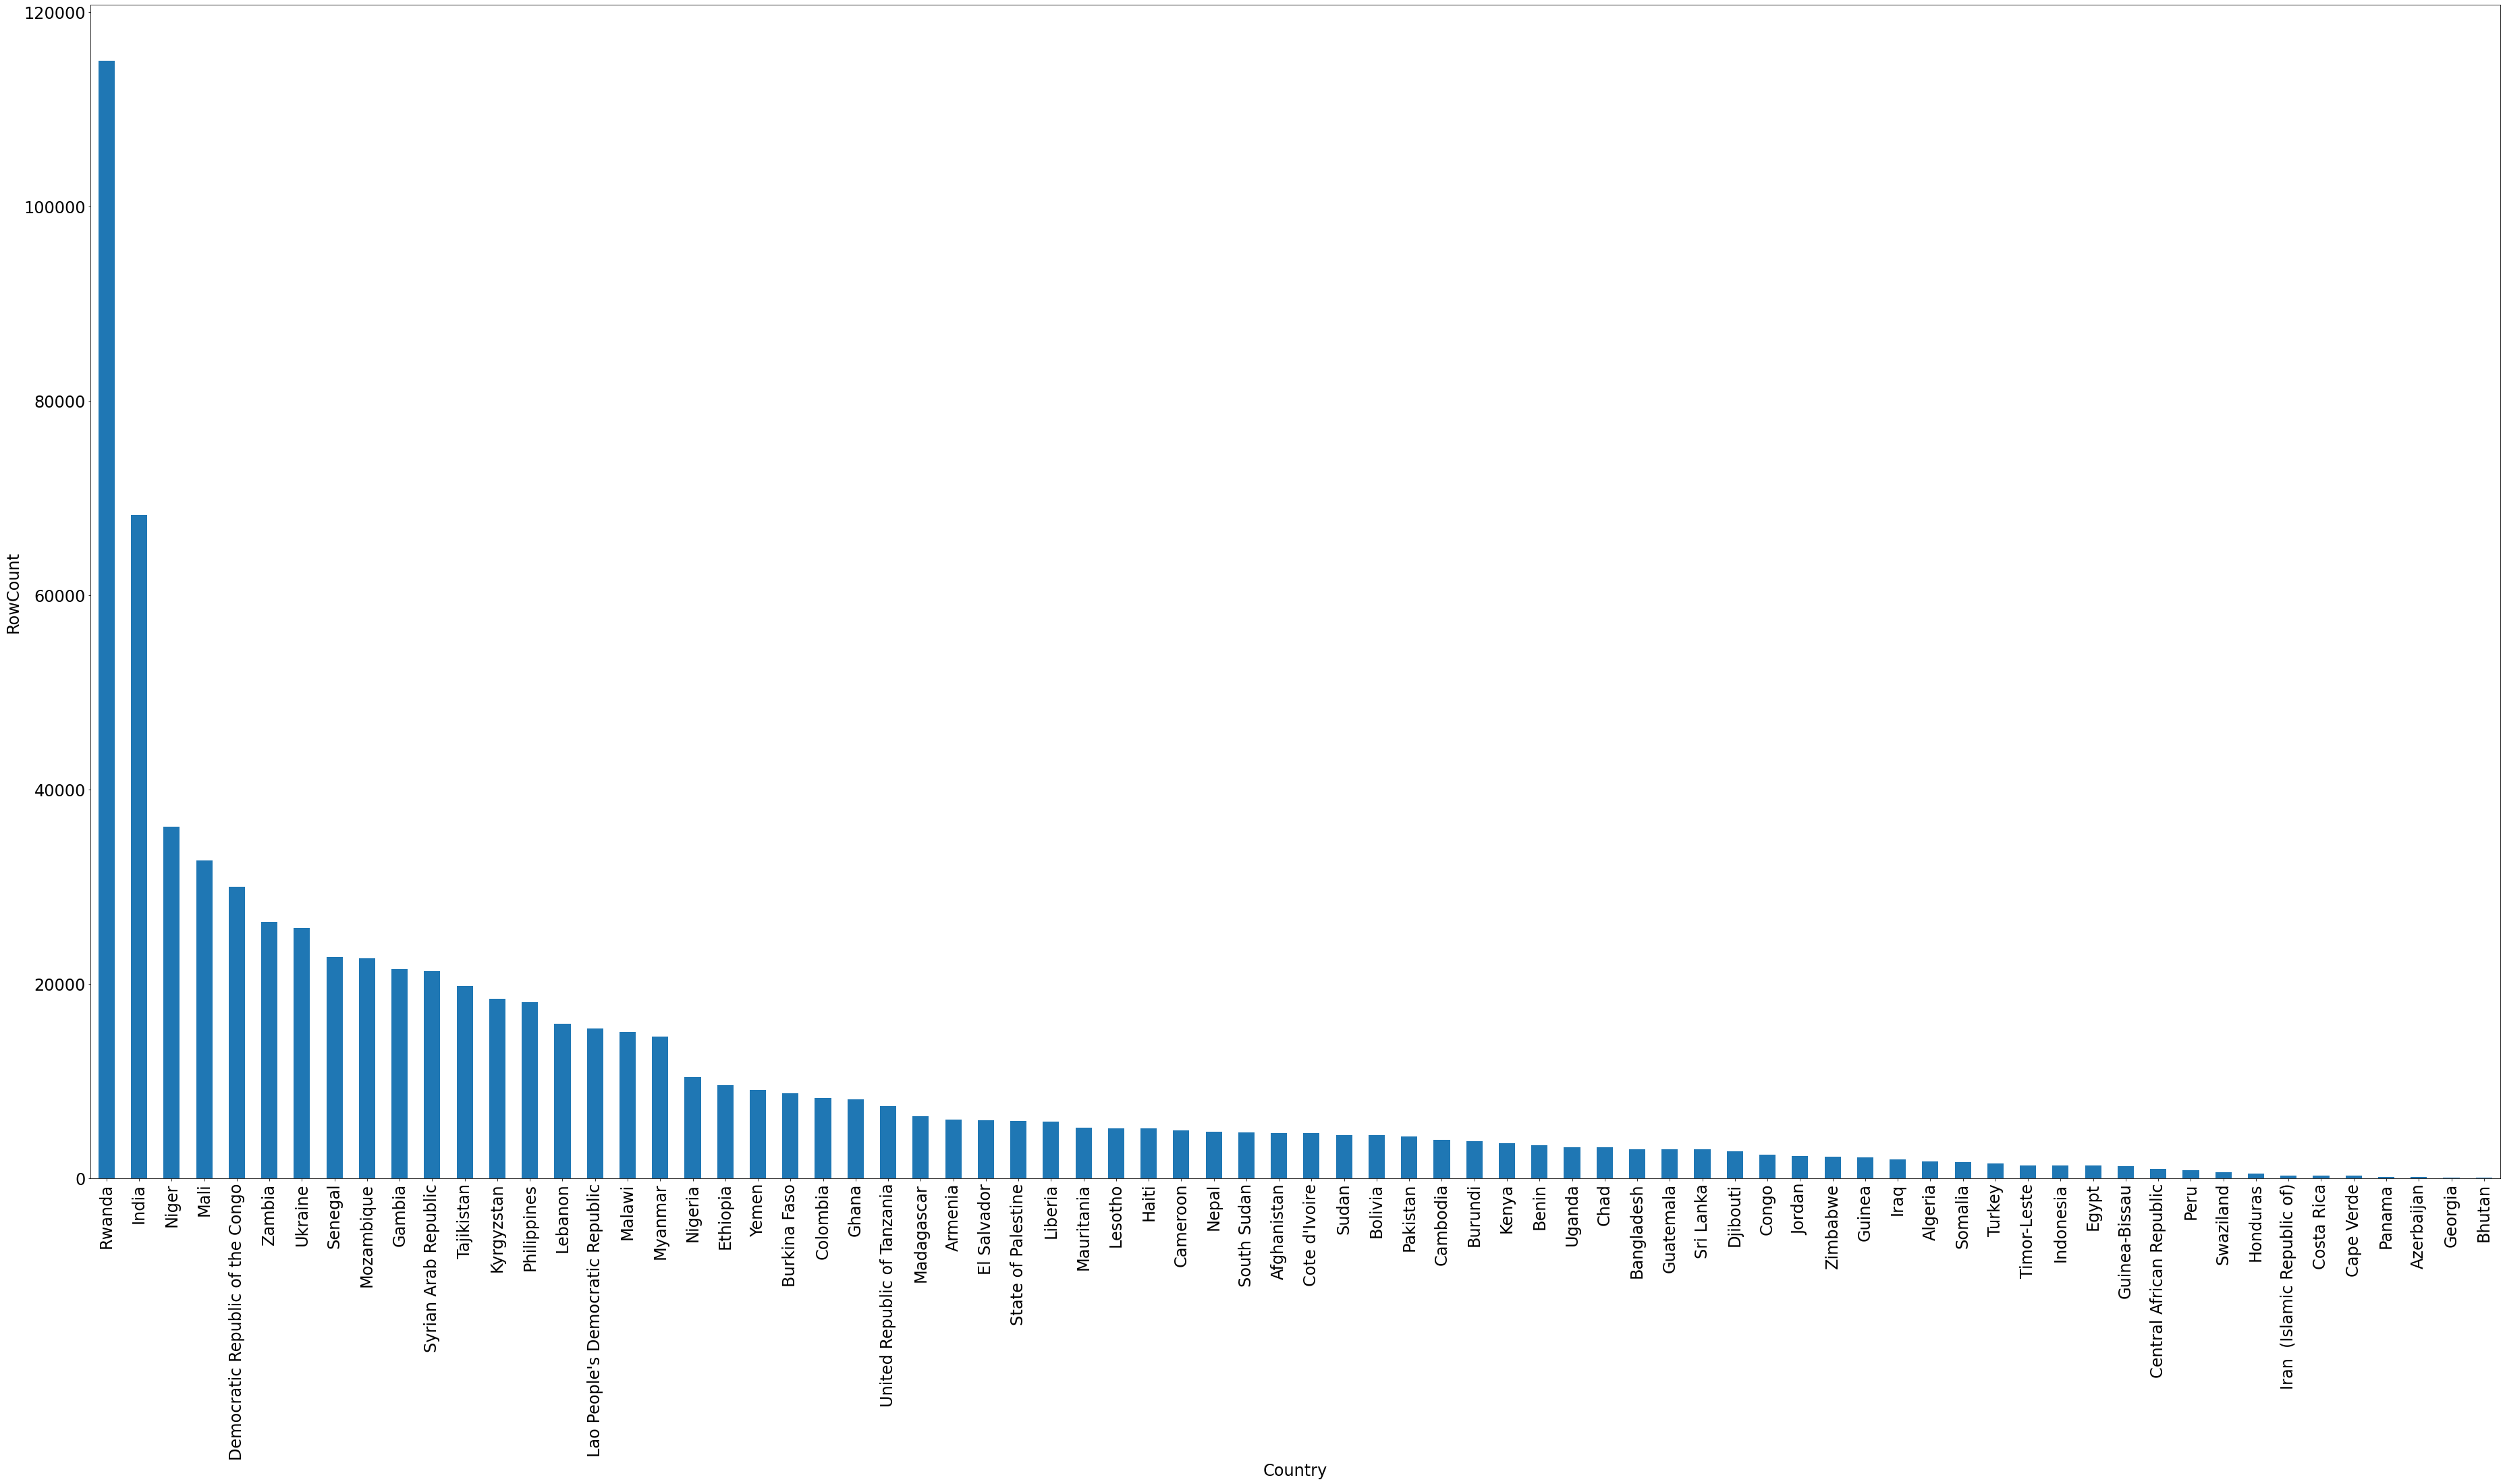

In [18]:
df_cpy = pd.DataFrame(listrows, columns = ['Country', 'RowCount'])
df_cpy= df_cpy.sort_values(by=['RowCount'],ascending=False)
ax= df_cpy.plot(kind='bar', y = 'RowCount',x ='Country',    
    legend = False,figsize=(64,32), fontsize=24)
ax.set_xlabel("Country",fontsize=24)
ax.set_ylabel("RowCount",fontsize=24)
plt.show()

From the above chart plotted to visualize the data available for each country. Rwanda has the highest number followed by India and Niger.

### Top 10 products produced around the globe

In [19]:
value_counts = df_count['commodity'].value_counts().nlargest(10)
df_value_counts = pd.DataFrame(value_counts)
df_value_counts = df_value_counts.reset_index()
df_value_counts.columns = ['commodity', 'top_commodity']
df_value_counts

,commodity,top_commodity
0,Maize,36582
1,Millet,33889
2,Sorghum,31037
3,Rice (imported),26606
4,Rice,24210
5,Maize (white),20875
6,Rice (local),20620
7,Sugar,19059
8,Wheat,17944
9,Wheat flour,17077


In [20]:
row_count = df_value_counts.shape[0]
row_count

10

In [21]:
df_all_cols = pd.merge(df_count, df_value_counts, how='inner')

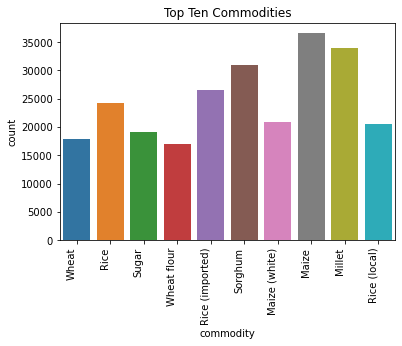

In [22]:
sns.countplot(x = "commodity", data = df_all_cols)
plt.xticks(rotation=90, horizontalalignment='right')
plt.title("Top Ten Commodities")
plt.show()

### Top 10 maize producing countries 

In [23]:
df2 = df_count.copy()
df2.head()

,country_id,country_name,locality_id,locality_name,market_id,market_name,commodityID,commodity,currency_id,currency_name,market_typeID,market_type,measurement_id,unit_goods_measurement,month,year,price,Source
0,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,1,2014,50.0,WFP
1,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,2,2014,50.0,WFP
2,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,3,2014,50.0,WFP
3,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,4,2014,50.0,WFP
4,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,5,2014,50.0,WFP


In [24]:
maize = df2.loc[df2["commodity"] == "Maize", :]
maize.head()

,country_id,country_name,locality_id,locality_name,market_id,market_name,commodityID,commodity,currency_id,currency_name,market_typeID,market_type,measurement_id,unit_goods_measurement,month,year,price,Source
16287,29,Benin,609,Alibori,1044,Malanville (CBM),51,Maize,26,XOF,14,Wholesale,5,KG,1,2002,145.0,SIMA - Niger
16288,29,Benin,609,Alibori,1044,Malanville (CBM),51,Maize,26,XOF,14,Wholesale,5,KG,1,2003,106.0,SIMA - Niger
16289,29,Benin,609,Alibori,1044,Malanville (CBM),51,Maize,26,XOF,14,Wholesale,5,KG,2,2003,107.5,SIMA - Niger
16290,29,Benin,609,Alibori,1044,Malanville (CBM),51,Maize,26,XOF,14,Wholesale,5,KG,3,2003,95.0,SIMA - Niger
16291,29,Benin,609,Alibori,1044,Malanville (CBM),51,Maize,26,XOF,14,Wholesale,5,KG,4,2003,95.0,SIMA - Niger


In [25]:
def is_top_10(country_name):
    return 'Malawi 'in country_name or 'Niger' in country_name or 'Mali' in country_name or 'Rwanda' in country_name or 'United Republic of Tanzania' in country_name or 'Burkina Faso' in country_name or 'Ghana' in country_name or 'Democratic Republic of the Congo' in country_name or 'Zimbabwe' in country_name or 'Tajikistan' in country_name

In [26]:
maize_real = maize.loc[maize["country_name"].apply(is_top_10) ,:]
maize_real.head()

,country_id,country_name,locality_id,locality_name,market_id,market_name,commodityID,commodity,currency_id,currency_name,market_typeID,market_type,measurement_id,unit_goods_measurement,month,year,price,Source
23675,42,Burkina Faso,40277,Cascades,129,Banfora,51,Maize,26,XOF,15,Retail,5,KG,1,2003,105.6558,SIM/SONAGESS
23676,42,Burkina Faso,40277,Cascades,129,Banfora,51,Maize,26,XOF,15,Retail,5,KG,2,2003,103.3953,SIM/SONAGESS
23677,42,Burkina Faso,40277,Cascades,129,Banfora,51,Maize,26,XOF,15,Retail,5,KG,3,2003,101.8303,SIM/SONAGESS
23678,42,Burkina Faso,40277,Cascades,129,Banfora,51,Maize,26,XOF,15,Retail,5,KG,4,2003,103.3039,SIM/SONAGESS
23679,42,Burkina Faso,40277,Cascades,129,Banfora,51,Maize,26,XOF,15,Retail,5,KG,5,2003,103.7575,SIM/SONAGESS


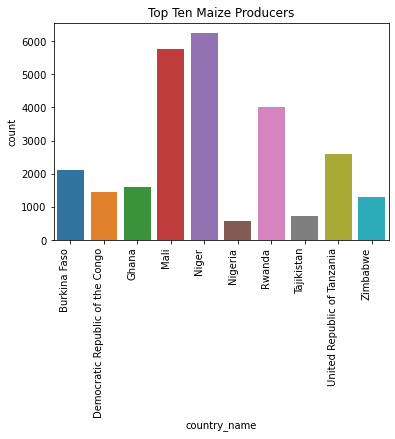

In [27]:
sns.countplot(x = "country_name", data = maize_real)
plt.xticks(rotation=90, horizontalalignment='right')
plt.title("Top Ten Maize Producers")
plt.show()

### Market  type Distribution

In [28]:
market_unique, market_freq = np.unique(df2['market_type'], return_counts = True)
marketrows = []
for i in range(market_unique.shape[0]):
    
    print(market_unique[i], ': ', market_freq[i])
    marketrows.append( [market_unique[i], market_freq[i]])

Farm Gate :  664
Producer :  228
Retail :  688878
Wholesale :  54144


In [29]:
marketrows

[['Farm Gate', 664],
 ['Producer', 228],
 ['Retail', 688878],
 ['Wholesale', 54144]]

In [30]:
df3 = df2.copy()

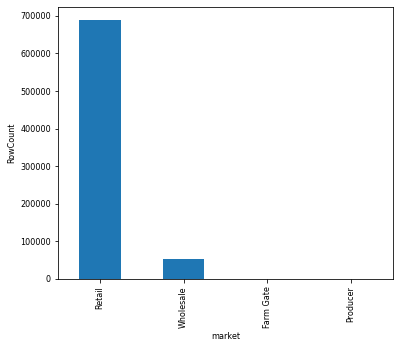

In [31]:
df2 = pd.DataFrame(marketrows, columns = ['market', 'RowCounts'])
df2= df2.sort_values(by=['RowCounts'],ascending=False)
ax= df2.plot(kind='bar', y = 'RowCounts',x ='market',    
    legend = False,figsize=(6,5), fontsize=8)
ax.set_xlabel("market",fontsize=8)
ax.set_ylabel("RowCount",fontsize=8)
plt.show()

In [32]:
df3["market_type"].value_counts()

Retail       688878
Wholesale     54144
Farm Gate       664
Producer        228
Name: market_type, dtype: int64

### Top 5 Countries with the most Retail Markets

In [33]:
retail = df3.loc[df3["market_type"] == "Retail", :]
retail.head()

,country_id,country_name,locality_id,locality_name,market_id,market_name,commodityID,commodity,currency_id,currency_name,market_typeID,market_type,measurement_id,unit_goods_measurement,month,year,price,Source
0,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,1,2014,50.0,WFP
1,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,2,2014,50.0,WFP
2,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,3,2014,50.0,WFP
3,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,4,2014,50.0,WFP
4,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,5,2014,50.0,WFP


In [34]:
retail_count = retail["country_name"].value_counts().nlargest(10)
retail_count

Rwanda                              115037
India                                68308
Niger                                36195
Mali                                 32702
Democratic Republic of the Congo     29997
Zambia                               26374
Ukraine                              25766
Senegal                              22783
Mozambique                           22652
Gambia                               21575
Name: country_name, dtype: int64

In [35]:
def is_top_5(country_name):
    return 'Rwanda'in country_name or 'India' in country_name or 'Niger' in country_name or 'Mali' in country_name or 'Democratic Republic of the Congo' in country_name 

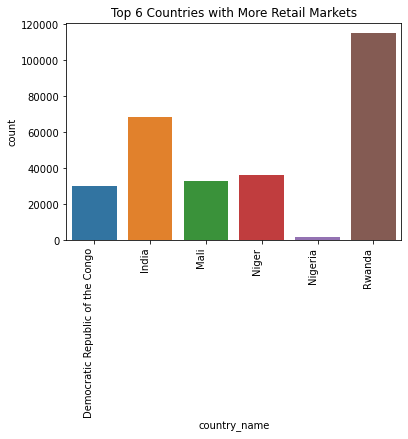

In [36]:
retail_real = retail.loc[retail["country_name"].apply(is_top_5) ,:]


sns.countplot(x = "country_name", data = retail_real)
plt.xticks(rotation=90, horizontalalignment='right')
plt.title("Top 6 Countries with More Retail Markets")
plt.show()


### Market Type Vs Price

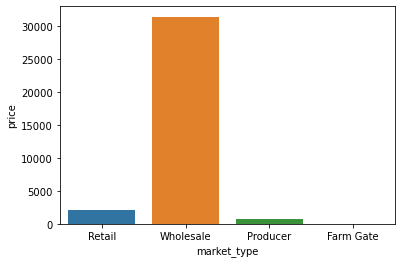

In [37]:
sns.barplot(x = "market_type", y = "price", data = df3, ci = False)
plt.show()

In [38]:
df4 = df3.copy()

In [39]:
chart_df = df3[["year","month","price"]]
chart_df

,year,month,price
0,2014,1,50.0
1,2014,2,50.0
2,2014,3,50.0
3,2014,4,50.0
4,2014,5,50.0
...,...,...,...
743909,2017,5,400.0
743910,2017,2,12.5
743911,2017,3,95.0
743912,2017,2,95.0


In [40]:
chart_df['year'].value_counts()

2015    111335
2014    104333
2016     95448
2013     92946
2012     72765
2011     53110
2017     48095
2010     36948
2009     33772
2008     27668
2007     18891
2006     12648
2005      8915
2004      6619
2003      5875
2002      3484
1996      1662
2000      1521
2001      1431
1994      1411
1998      1267
1997      1264
1999      1184
1995      1058
1992       132
1993       132
Name: year, dtype: int64

In [41]:
chart_df['year']= chart_df['year'].astype(str)

C:\Users\USER\AppData\Local\Temp\ipykernel_6616\4105164955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chart_df['year']= chart_df['year'].astype(str)


In [42]:
chart_df['month']= chart_df['month'].astype(str)

C:\Users\USER\AppData\Local\Temp\ipykernel_6616\2925948683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chart_df['month']= chart_df['month'].astype(str)


In [43]:
##chart_df['year'].info()

In [44]:
chart_df['period']= pd.to_datetime(chart_df['year'].astype(str) + '-' + chart_df['month'].astype(str),yearfirst=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_6616\3805378901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chart_df['period']= pd.to_datetime(chart_df['year'].astype(str) + '-' + chart_df['month'].astype(str),yearfirst=True)


In [45]:
chart_df.head()

,year,month,price,period
0,2014,1,50.0,2014-01-01
1,2014,2,50.0,2014-02-01
2,2014,3,50.0,2014-03-01
3,2014,4,50.0,2014-04-01
4,2014,5,50.0,2014-05-01


In [46]:
##chart_df.info()

In [47]:
chart= chart_df.drop(['year', 'month'], axis=1)
chart.head()

,price,period
0,50.0,2014-01-01
1,50.0,2014-02-01
2,50.0,2014-03-01
3,50.0,2014-04-01
4,50.0,2014-05-01


In [48]:
chart.set_index('period',inplace=True)

In [49]:
chart.head()

,price
period,
2014-01-01,50.0
2014-02-01,50.0
2014-03-01,50.0
2014-04-01,50.0
2014-05-01,50.0


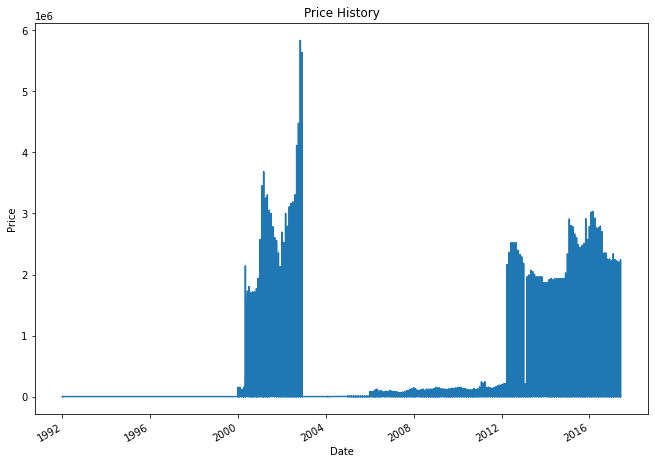

In [50]:
plt.figure(figsize=(11, 8)) # resizing the plot
chart['price'].plot()
plt.title('Price History') # adding a title
plt.xlabel('Date') # x label
plt.ylabel('Price') # y label
plt.show()

In [51]:
df3.head()

,country_id,country_name,locality_id,locality_name,market_id,market_name,commodityID,commodity,currency_id,currency_name,market_typeID,market_type,measurement_id,unit_goods_measurement,month,year,price,Source
0,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,1,2014,50.0,WFP
1,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,2,2014,50.0,WFP
2,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,3,2014,50.0,WFP
3,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,4,2014,50.0,WFP
4,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,5,2014,50.0,WFP


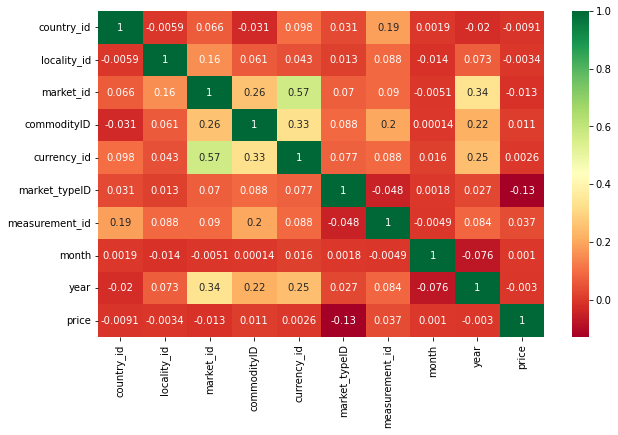

In [52]:
corrMatrix = df3.corr()
plt.subplots(figsize=(10, 6))
sns.heatmap(corrMatrix, annot=True, cmap="RdYlGn")
plt.show()

The Correlation Heat Map chart of the dataset
It shows an extreme negative correlation between market type ID and the price. Also the market type id feature looks to be the least correlated with price. 

In [53]:
ng_data= df3[df3['country_name'] == 'Nigeria']
ng_data

,country_id,country_name,locality_id,locality_name,market_id,market_name,commodityID,commodity,currency_id,currency_name,market_typeID,market_type,measurement_id,unit_goods_measurement,month,year,price,Source
432161,182,Nigeria,65709,Sokoto,1037,Illela (CBM),51,Maize,95,NGN,14,Wholesale,5,KG,1,2002,153.3485,SIMA - Niger
432162,182,Nigeria,65709,Sokoto,1037,Illela (CBM),51,Maize,95,NGN,14,Wholesale,5,KG,3,2002,171.2454,SIMA - Niger
432163,182,Nigeria,65709,Sokoto,1037,Illela (CBM),51,Maize,95,NGN,14,Wholesale,5,KG,4,2002,188.3671,SIMA - Niger
432164,182,Nigeria,65709,Sokoto,1037,Illela (CBM),51,Maize,95,NGN,14,Wholesale,5,KG,5,2002,189.0390,SIMA - Niger
432165,182,Nigeria,65709,Sokoto,1037,Illela (CBM),51,Maize,95,NGN,14,Wholesale,5,KG,6,2002,187.8219,SIMA - Niger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442562,182,Nigeria,2224,Kaduna,1982,Saminaka,483,Gari (white),95,NGN,14,Wholesale,9,100 KG,1,2017,19475.0000,"FEWS NET, Nigeria"
442563,182,Nigeria,2224,Kaduna,1982,Saminaka,483,Gari (white),95,NGN,14,Wholesale,9,100 KG,2,2017,20700.0000,"FEWS NET, Nigeria"
442564,182,Nigeria,2224,Kaduna,1982,Saminaka,483,Gari (white),95,NGN,14,Wholesale,9,100 KG,3,2017,22380.0000,FEWSNET
442565,182,Nigeria,2224,Kaduna,1982,Saminaka,483,Gari (white),95,NGN,14,Wholesale,9,100 KG,4,2017,21595.0000,FEWS NET


In [54]:
ng_data.shape

(10406, 18)

### EDA for Nigeria Data

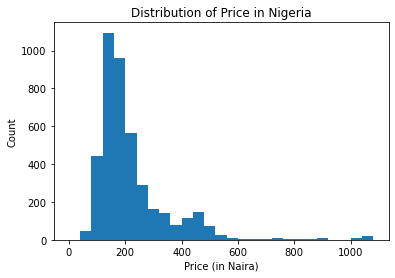

In [55]:
plt.hist(ng_data["price"], bins = np.arange(0, 1100, 40))
plt.title("Distribution of Price in Nigeria")
plt.xlabel("Price (in Naira)")
plt.ylabel("Count")
plt.show()

Based on the histogram we can see that in Nigeria,the bulk of the foood prices was between the range 50 to 500 naira.

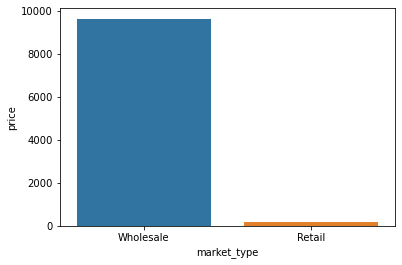

In [56]:
sns.barplot(x = "market_type", y = "price", data = ng_data, ci = False)
plt.show()

In [57]:
ng_data["market_type"].value_counts()

Wholesale    8640
Retail       1766
Name: market_type, dtype: int64

From the barchart we can see that Nigeria had more records for  wholesale markets.

In [58]:
ng_data.describe()

,country_id,locality_id,market_id,commodityID,currency_id,market_typeID,measurement_id,month,year,price
count,10406.0,10406.000000,10406.000000,10406.000000,10406.0,10406.000000,10406.000000,10406.000000,10406.000000,10406.000000
mean,182.0,14224.779166,1762.597348,186.389871,95.0,14.169710,10.581491,6.374592,2014.333365,8039.350270
std,0.0,24856.123292,391.870665,167.440767,0.0,0.375396,6.462477,3.508592,3.029132,9306.273337
min,182.0,2211.000000,1037.000000,51.000000,95.0,14.000000,5.000000,1.000000,2002.000000,55.500000
25%,182.0,2223.000000,1968.000000,65.000000,95.0,14.000000,9.000000,3.000000,2014.000000,200.000000
50%,182.0,2226.000000,1973.000000,84.000000,95.0,14.000000,9.000000,6.000000,2015.000000,5555.000000
75%,182.0,2240.000000,1977.000000,285.000000,95.0,14.000000,9.000000,9.000000,2016.000000,13668.500000
max,182.0,65710.000000,1982.000000,484.000000,95.0,15.000000,33.000000,12.000000,2017.000000,90000.000000


In [59]:
# FOOD TYPE COUNT 
food_types = ng_data['commodity'].unique()
count = 0
for i in food_types:
     count+=1
count


22

In [60]:
# Calculating the average price of all food items
food =pd.DataFrame(ng_data.groupby("commodity")["price"].agg("mean").sort_values(ascending=False))
food.head(10)

,price
commodity,
Groundnuts (shelled),21166.580747
Rice (local),20448.206774
Yam,19509.245540
Cowpeas (brown),18045.899046
Cowpeas (white),15827.195325
Gari (yellow),12309.754147
Yam (Abuja),11794.671429
Gari (white),10724.702252
Sorghum (brown),8932.884235


In [61]:
value_counts_list =[]
value_counts = ng_data['locality_name'].value_counts()
value_counts_list.append(value_counts)
print (value_counts_list)

[Katsina    1614
Borno      1389
Kaduna     1108
Jigawa      892
Yobe        720
Sokoto      605
Oyo         603
Gombe       595
Kebbi       595
Zamfara     595
Lagos       545
Kano        543
Adamawa     430
Abia        172
Name: locality_name, dtype: int64]


In [62]:
value_counts = ng_data['locality_name'].value_counts()
df_value_counts = pd.DataFrame(value_counts)
df_value_counts = df_value_counts.reset_index()
df_value_counts.columns = ['locality_name', 'city_count']
df_value_counts

,locality_name,city_count
0,Katsina,1614
1,Borno,1389
2,Kaduna,1108
3,Jigawa,892
4,Yobe,720
5,Sokoto,605
6,Oyo,603
7,Gombe,595
8,Kebbi,595
9,Zamfara,595


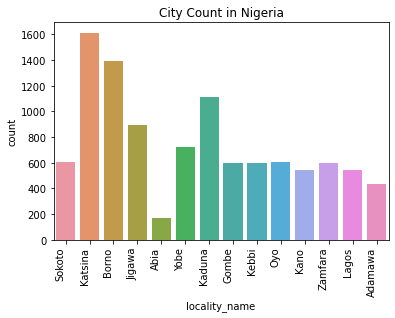

In [63]:
ng_all_cols = pd.merge(ng_data, df_value_counts, how='inner')

sns.countplot(x = "locality_name", data = ng_all_cols)
plt.xticks(rotation=90, horizontalalignment='right')
plt.title("City Count in Nigeria")
plt.show()

In [64]:
# Calculating the average price for cities
city =pd.DataFrame(ng_data.groupby("locality_name")["price"].agg("mean").sort_values(ascending=False))
city.head(10)



,price
locality_name,
Adamawa,12573.226510
Kebbi,12492.156576
Lagos,12110.941385
Oyo,10920.677267
Kano,10483.984673
Yobe,10170.967819
Gombe,9891.554389
Zamfara,9796.284208
Kaduna,9070.206022


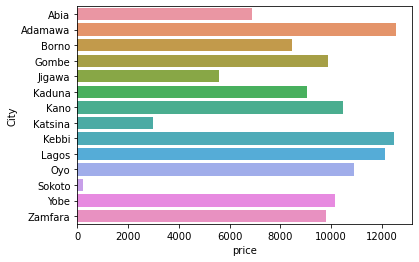

In [67]:
# Visualization of Average price for each city
sns.barplot(data = pd.DataFrame(ng_data.groupby('locality_name')['price'].mean()).reset_index().sort_values(by='locality_name').rename({'locality_name':'City'},axis=1),
           x='price',
           y='City')
plt.show()

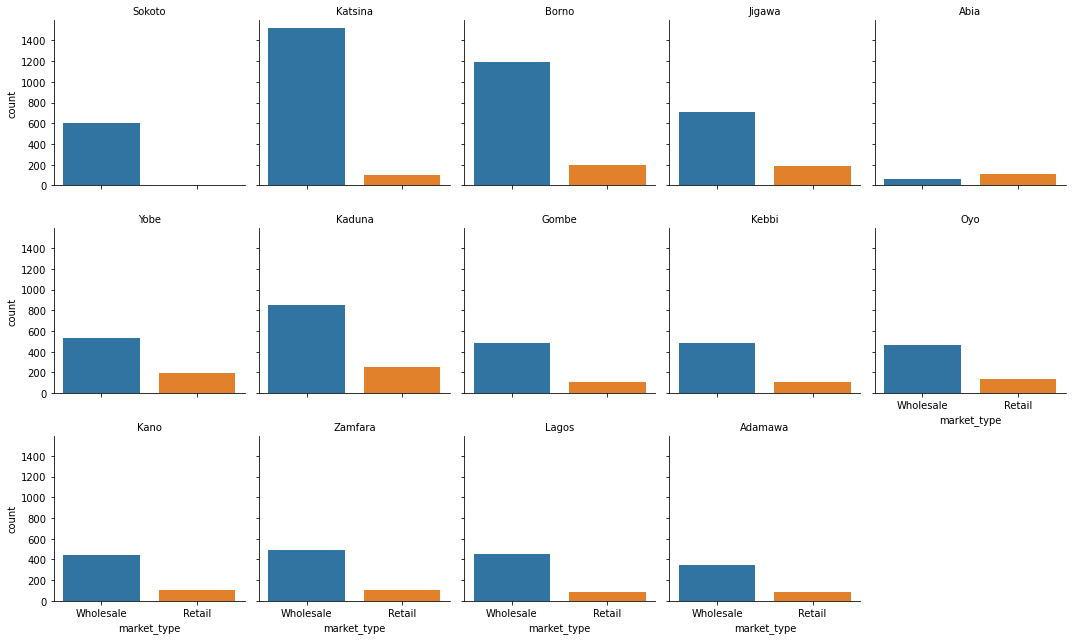

In [68]:
#distribution of each market types in all cities
g = sns.catplot(x="market_type", col="locality_name", col_wrap= 5,
                data=ng_data,
                kind="count", height=3.0, aspect=1)
(g.set_titles("{col_name}"),  g.set_xticklabels(["Wholesale", "Retail"]))
plt.show()